In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

import corsikadata
import simple_conv_net
from tqdm.notebook import tqdm as tqdm_notebook

import time

corsika_data module imported

simple_conv_net module imported



In [2]:
start = time.perf_counter()

files = ["data/taiga607_st2b_0", "data/taiga623_st2b_0"]
dataset = corsikadata.CorsikaData()

dataset.load(files)

end = time.perf_counter()
print(f"Elapsed time: {end - start:.6f} seconds")

after init data shape (0, 1, 27, 27)
after init labels shape (0,)
loading file data/taiga607_st2b_0

before concatenate data shape (0, 1, 27, 27)

before concatenate labels shape (0,)
after concatenate labels data (47109, 1, 27, 27) 

after concatenate labels shape (47109,) 

after goodness cut data shape (47109, 1, 27, 27)
after goodness cut labels shape (47109,)
data.dtype: float32
labels.dtype: int64 


loading file data/taiga623_st2b_0

before concatenate data shape (47109, 1, 27, 27)

before concatenate labels shape (47109,)
after concatenate labels data (88953, 1, 27, 27) 

after concatenate labels shape (88953,) 

after goodness cut data shape (88474, 1, 27, 27)
after goodness cut labels shape (88474,)
data.dtype: float32
labels.dtype: int64 


loading files done


Elapsed time: 6.252542 seconds


In [67]:
train_loader, test_loader = dataset.create_data_loader(batch_size=256, train_portion = 0.8, shuffle_seed = 42)

DataLoaders done


In [68]:
def evaluate_accuracy(model, test_loader):
    correct = 0
    total = 0
    model.eval()  # set the model to evaluation mode
    with torch.no_grad():
        for data, labels in test_loader:
            # Move data and labels to the model's device
            data, labels = data.to(model.device), labels.to(model.device)
            y_pred = model(data)
            y_pred = y_pred.reshape(len(labels))
            y_pred = y_pred > 0.5  # threshold predictions
            correct += (y_pred == labels).sum().item()
            total += len(labels)
    accuracy = correct / total
    return accuracy

In [69]:
net = simple_conv_net.SimpleConvNet()
losses = []
accuracies = []

CNN will run on device: cuda


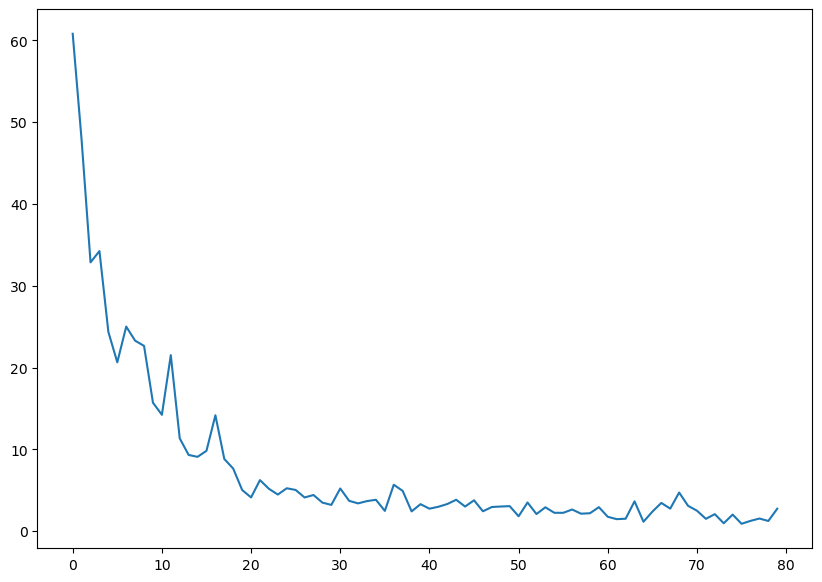

Обучение закончено


In [70]:
from IPython.display import clear_output, display
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

epochsN = 40

for epoch in tqdm_notebook(range(epochsN)):
    running_loss = 0.0
    i = 0
    # Iterate over the single train_loader that returns (data, labels) pairs
    for data, labels in train_loader:
        net.my_optimizer.zero_grad()
        
        # Forward pass
        y_pred = net(data.to(net.device))
        y_pred = y_pred.reshape(len(labels))
        
        # Convert to float
        labels = labels.to(torch.float32)
        y_pred = y_pred.to(torch.float32)
        
        # Compute loss and backpropagate
        loss = net.my_loss_fn(y_pred, labels.to(net.device))
        loss.backward()
        net.my_optimizer.step()
        
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss))
            losses.append(running_loss)
            # Evaluate accuracy with the updated single test_loader (which returns (data, labels))
            accuracies.append(evaluate_accuracy(net, test_loader))
            running_loss = 0.0
        i += 1
    ax.clear()
    ax.plot(np.arange(len(losses)), losses)
    clear_output(wait=True)
    display(fig)
    plt.show()
print('Обучение закончено')

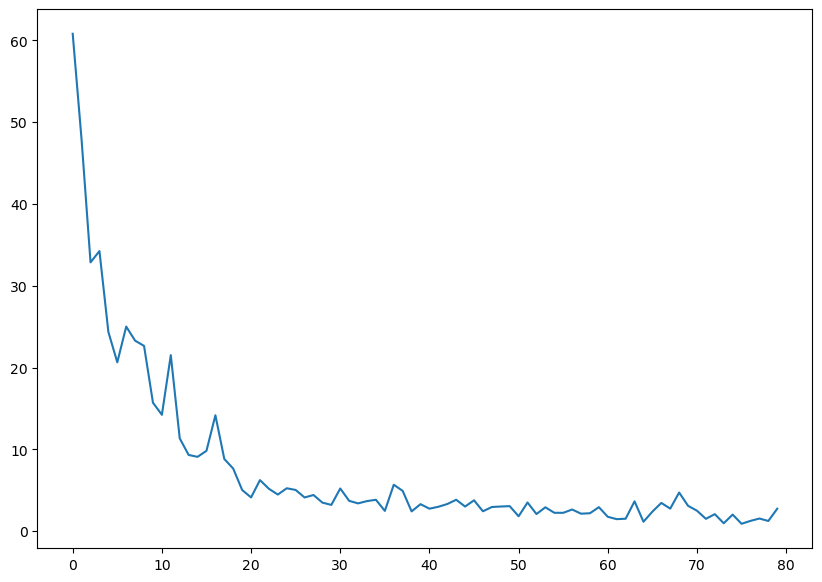

In [71]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.arange(len(losses)), losses)
plt.show()


In [72]:
len(losses)

80

In [73]:
evaluate_accuracy(net, test_loader)

0.9912969765470472

In [74]:
evaluate_accuracy(net, train_loader)

0.9978807273343788